# Netflix Movies and TV Shows
<div style="color:#140033;
           display:fill;
           border-radius:15px;
            border-style: solid;
           border-width: 15px;
            border-color:#f0e6ff;
           background-color:#f0e6ff;
           letter-spacing:0.75px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    
<h2><b>Context</b></h2><h4 style = "line-height:1.3;">
    This notebook deals with <a href = 'https://www.kaggle.com/shivamb/netflix-shows'>Netflix movies and TV shows</a> data.</h4>
    <h3 style = "line-height:1.5;"><b>TV Shows and Movies listed on Netflix</b></h3>
    <h4 style = "line-height:1.3;">
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.</h4>
<h2><b>Motivation</b></h2>
<h3>Tasks which can be performed on this dataset -</h3>
<ul>
    <li>Understanding what content is available in different countries</li>
    <li>Identifying similar content by matching text-based features</li>
    <li>Network analysis of Actors / Directors and find interesting insights</li>
    <li>Is Netflix has increasingly focusing on TV rather than movies in recent years?</li>
</ul>
</div>


In [1]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
sns.set_style("whitegrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import datetime as dt
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 15,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
         'axes.labelsize': 18,
         'axes.titlesize':20,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
plt.rcParams.update(params)
img_fmt = 'svg'

In [2]:
#Analysing the input dataframe
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()
df.info()
df.describe().T

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


# Data Preparation

In [3]:
df['release_year'] = pd.to_datetime(df['release_year'],format='%Y')
df['date_added'] = pd.to_datetime(df['date_added'])
indeks = df[np.isnan(df['date_added'])].index
df.loc[indeks, 'date_added'] = df.loc[indeks, 'release_year']
df['release_year'] = df['release_year'].dt.year

# Exploratory Data Analysis
## Content type on Netflix

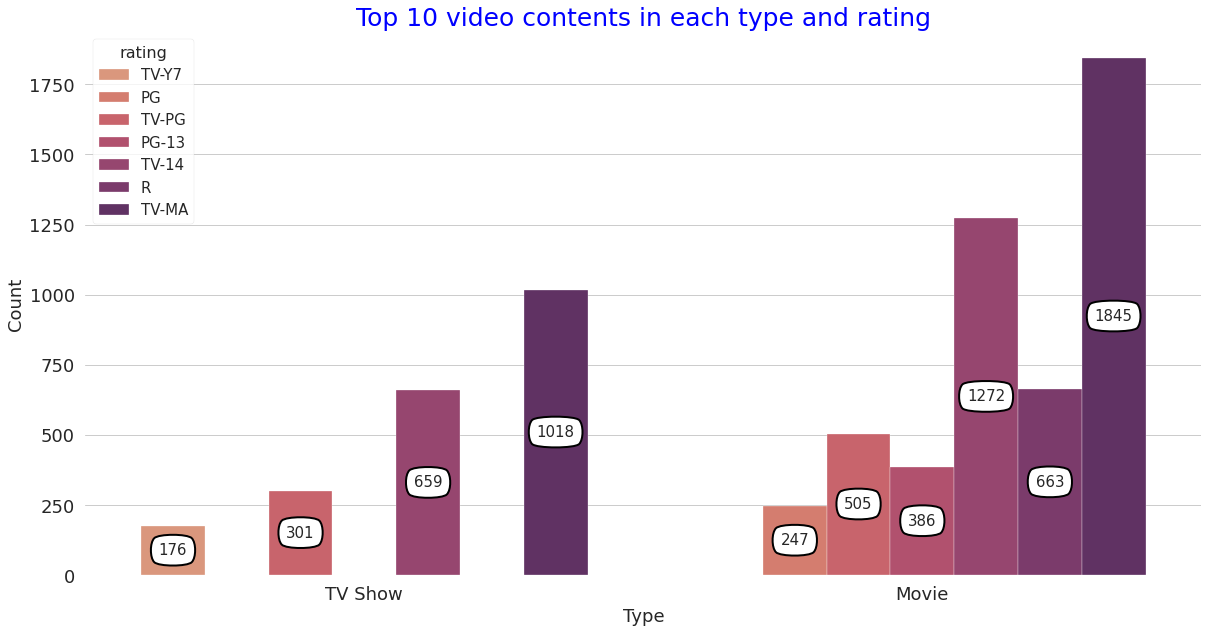

In [4]:
title = 'Top 10 video contents in each type and rating'
df_type_rating = df.groupby(['type','rating']).count().show_id.reset_index().sort_values(by = 'show_id').tail(10)
fig,ax = plt.subplots(figsize = (20,10))
plots = sns.barplot(data = df_type_rating, x='type',y = 'show_id', hue = 'rating', palette='flare',)
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.title(title, fontsize = 25, color = 'blue')
_ = plt.xlabel('Type')
_ = plt.ylabel('Count')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

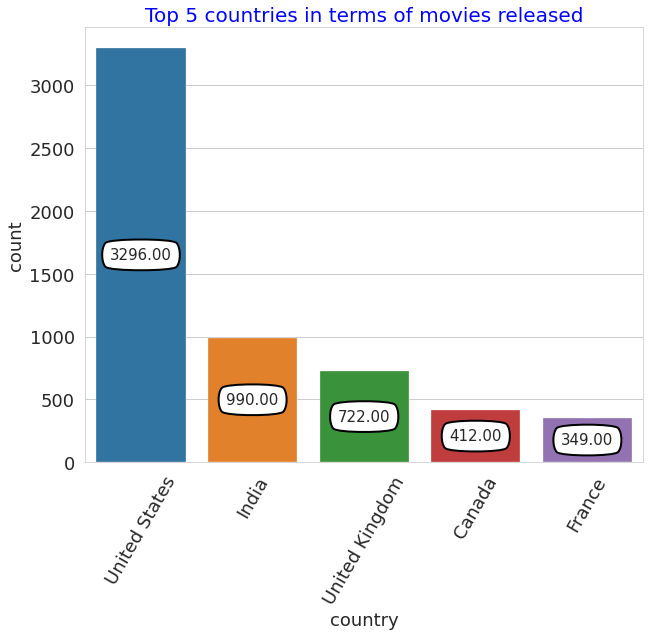

In [5]:
title = 'Top 5 countries in terms of movies released'
countries = {}
for country in df.country.dropna():
    for sub_country in str(country).split(', '):
        if sub_country not in countries:
            countries[sub_country] = 1
        else: countries[sub_country] += 1
df_countries = pd.DataFrame(list(countries.items()),columns = ['country','count']).sort_values(by = ['count'])
_ = plt.subplots(figsize = (10,8))
_ = plt.xticks(rotation = 60)
_ = plt.title(title, color='blue', fontsize=20)
plots = sns.barplot(data = df_countries.tail()[::-1],x= 'country', y='count')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

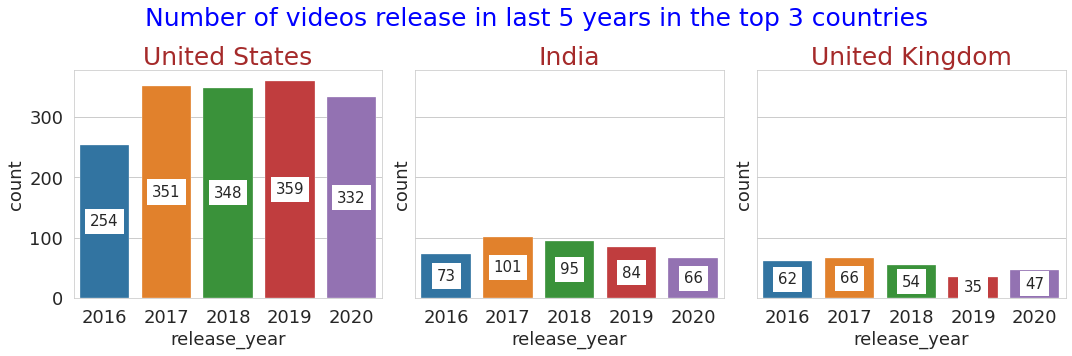

In [6]:
title = 'Number of videos release in last 5 years in the top 3 countries'
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5),sharey=True)
_ = fig.suptitle(title, fontsize = 25, color = 'blue')
i = 0
for country in df_countries.tail(3).country.values[::-1]:
    df_country = df.loc[df.country == country].loc[(df.release_year>2015) & (df.release_year<=2020)]
    plots = sns.countplot(data = df_country,x= 'release_year', ax = ax[i])
    _ = ax[i].set_title(country,color='brown', fontsize=25)
    for bar in plots.patches:
        _ = plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()/2), ha='center', va='center',
                       size=15, xytext=(0, 0),bbox=dict(fc="w", ec="white", lw=2),
                       textcoords='offset points')
    i += 1
fig.tight_layout()
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

# Number of programmes released by year

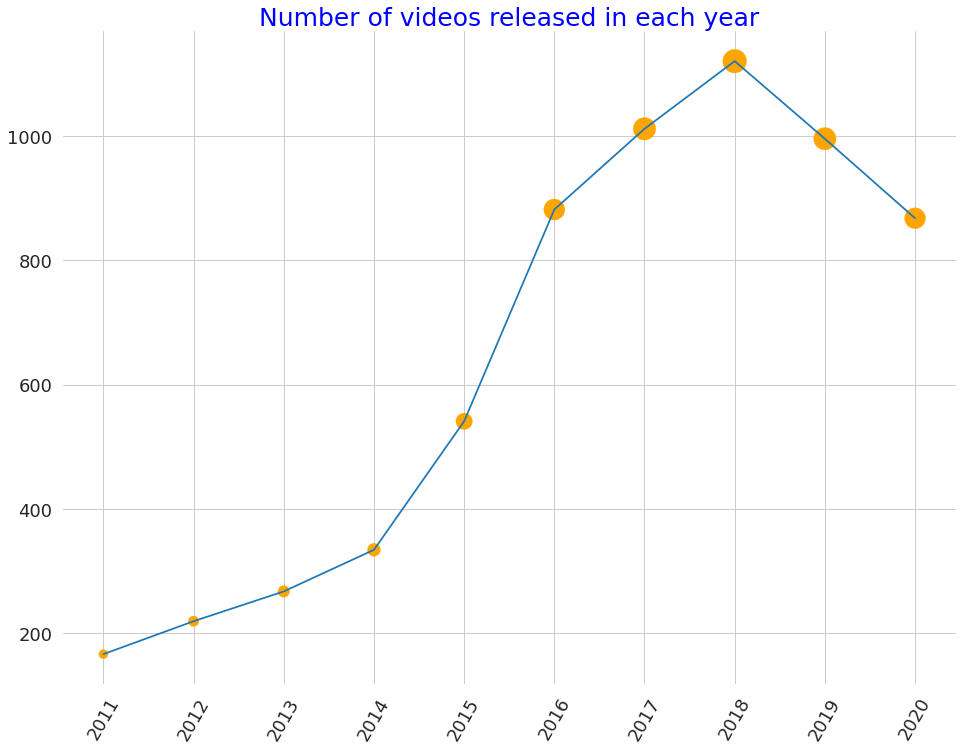

In [7]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

title = 'Number of videos released in each year'
_ = plt.figure(figsize=(16,12))
_ = plt.plot(release[-11:-1])
_ = plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='orange');
_ = plt.box(on=None);
_ = plt.xticks(rotation = 60)
_ = plt.xticks(release[-11:-1].index);
_ = plt.title(title, color='blue', fontsize=25);
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">There is an increasing trend starting from the year 2011 and the trend starts to seetle with some dip in the movies counts post 2018.
It shows that most number of videos got released in 2018 comparatively higher than 2019 and 2020. </h3>
</div>

# Number of programmes by Rating

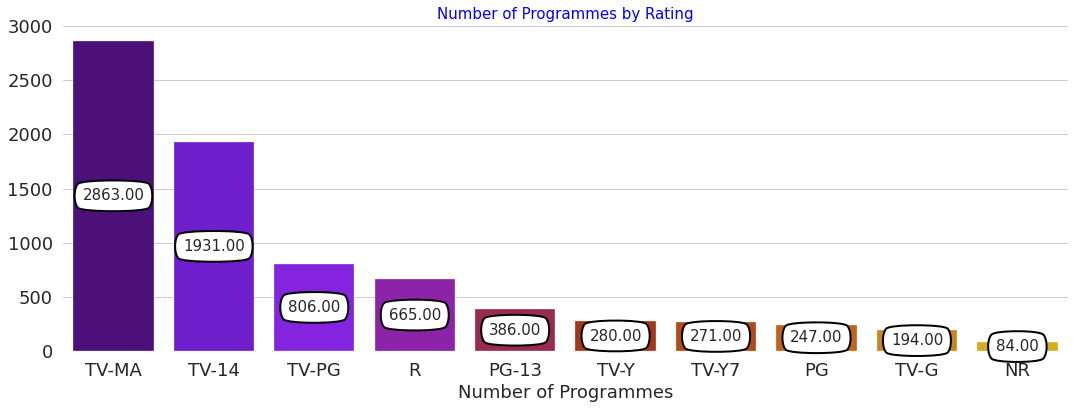

In [8]:
rating = df['rating'].value_counts()
#rating = rating.sort_values()

title = 'Number of Programmes by Rating'
_ = plt.figure(figsize=(18,6));
_ = plt.title(title, color='blue', fontsize=15)
plots = sns.barplot(y=rating.values[:10], x=rating.index[:10], palette='gnuplot',orient='v');
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.xlabel('Number of Programmes')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

# Most Popular Programmes by Country & Rating

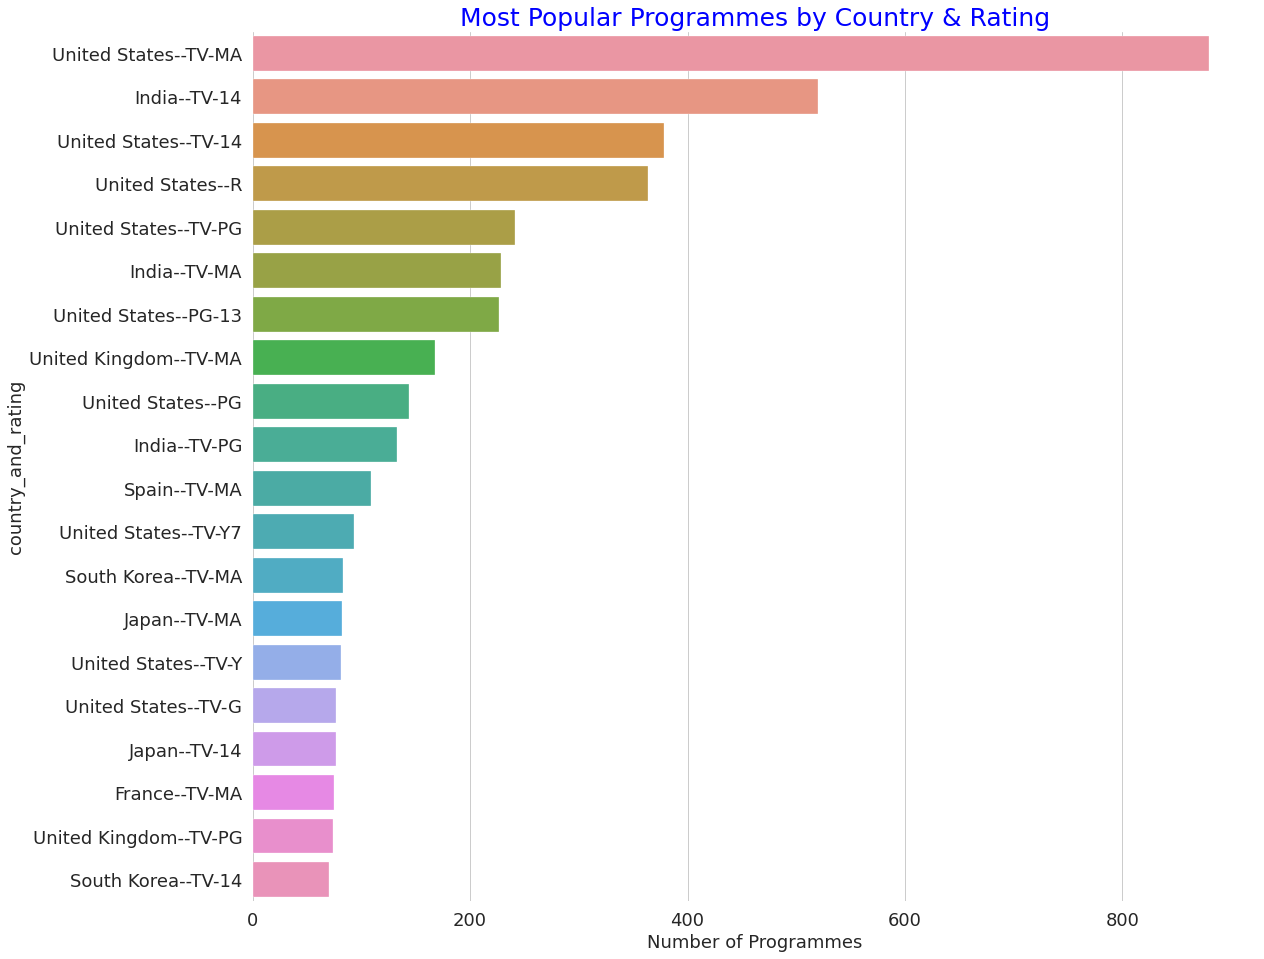

In [9]:
country_rating = df.groupby(['country', 'rating']).count().sort_values('show_id', ascending=False).reset_index()
country_rating['country_and_rating'] = country_rating[['country','rating']].apply(axis=1,func = lambda x : str(x.country)+'--'+str(x.rating))
country_rating.set_index(keys = 'country_and_rating', inplace = True)

title = 'Most Popular Programmes by Country & Rating'
_ = plt.figure(figsize=(18,16))
plots = sns.barplot(y=country_rating.index[:20], x = country_rating['show_id'][:20]);
_ = plt.box(on=None)
_ = plt.title(title, fontsize=25, color='blue')
_ = plt.xlabel('Number of Programmes');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

# Analysis on Movie Programmes

## Movies by Rating

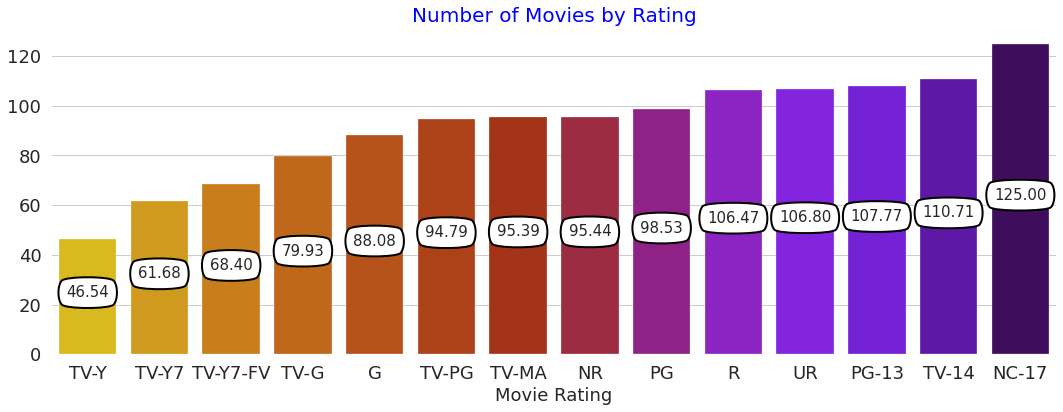

In [10]:
movie = df.copy()
movie = movie[movie['type'] == 'Movie']

movie['minute'] = [int(re.findall('\d{1,3}', w)[0]) for w in movie.duration.ravel()]

duration_rating = movie.groupby(['rating']).mean().sort_values('minute')
title = 'Number of Movies by Rating'
_ = plt.figure(figsize=(18,6))
plots = sns.barplot(x=duration_rating.index, y=duration_rating.minute.values, palette='gnuplot_r')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
_ = plt.box(on=None)
_ = plt.title(title, fontsize = 20, color = 'blue')
_ = plt.xlabel('Movie Rating')
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

# Movie's Duration Trends

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='release_year'>

Text(0, 0.5, 'Movie duration in minutes')

Text(0.5, 0, 'Year of released')

Text(0.5, 1.0, "YoY Trends of Movie's Duration")

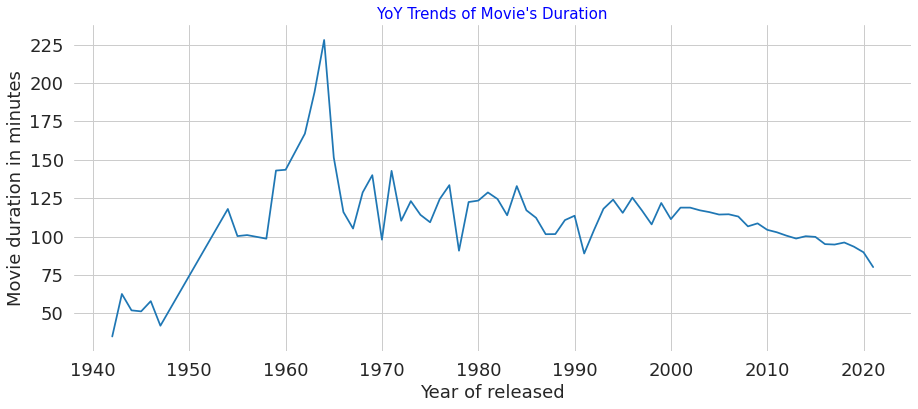

In [11]:
duration_year = movie.groupby(['release_year']).mean().sort_values('minute')
duration_year = duration_year.sort_index()

title = "YoY Trends of Movie's Duration"
plt.figure(figsize=(15,6))
sns.lineplot(x=duration_year.index, y=duration_year.minute.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes');
plt.xlabel('Year of released');
plt.title(title, fontsize=15, color='blue');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">The average movie's duration released during 1960 era was the longest </h3>
</div>

# Director's Productivity by Total Minutes of Movies Produced

Text(0.5, 0, 'Length of Total Movies Released in Minutes')

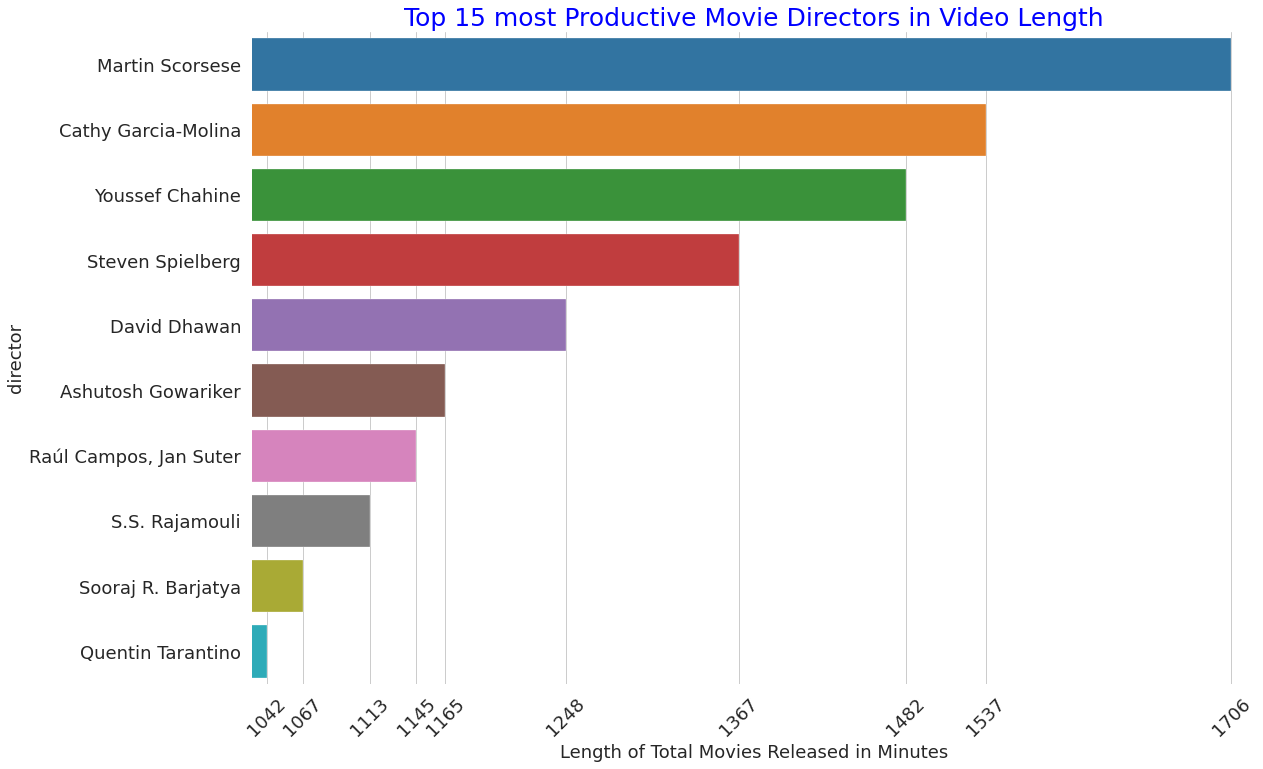

In [12]:
director_minute = movie.groupby('director').sum().sort_values('minute', ascending=False)
title = 'Top 15 most Productive Movie Directors in Video Length'
_ = plt.figure(figsize=(18,12))
_ = sns.barplot(y=director_minute.index[:10], x=director_minute.minute[:10]);
_ = plt.title(title, color='blue', fontsize=25)
_ = plt.xticks(director_minute.minute[:10],rotation = 45)
_ = plt.xlim(min(director_minute.minute[:10])/10*9.9,max(director_minute.minute[:10])/10*10.1)
_ = plt.box(on=None)
plt.xlabel('Length of Total Movies Released in Minutes');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

<div style="color:#001724;
           display:fill;
           border-radius:50px;
            border-style: solid;
            padding: 25px 25px;
           border-width: 15px;
            border-color:#001724;
           background-color:#d0e7f5;
           letter-spacing:1.1px;
            font-family:'Futura';
            line-height: 1.7em;
            font-size:1.5em;">
    <h3 style = "line-height:1.3;">Although Raul Campos produced more Movies, Martin Scorcece still outperform Raul in terms of the total duration of the movies </h3>
</div>

# The Most Productive Director by number of movies produced

Text(0.5, 0, 'Count of Total Movies Released')

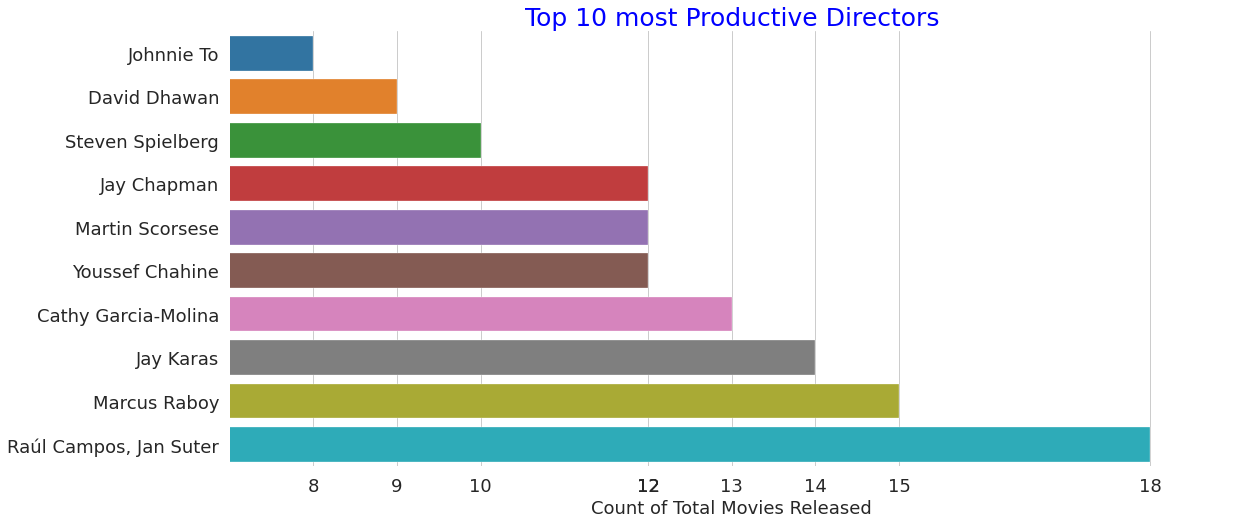

In [13]:
title = 'Top 10 most Productive Directors'
_ = plt.figure(figsize=(18,8))
_ = sns.barplot(y=movie.director.value_counts()[:10].sort_values().index, x=movie.director.value_counts()[:10].sort_values().values);
_ = plt.title(title, color='blue', fontsize=25)
_ = plt.box(on=None)
_ = plt.xticks(movie.director.value_counts()[:10].sort_values().values);
_ = plt.xlim(min(movie.director.value_counts()[:10])-1,max(movie.director.value_counts()[:10])+1)
plt.xlabel('Count of Total Movies Released');
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)

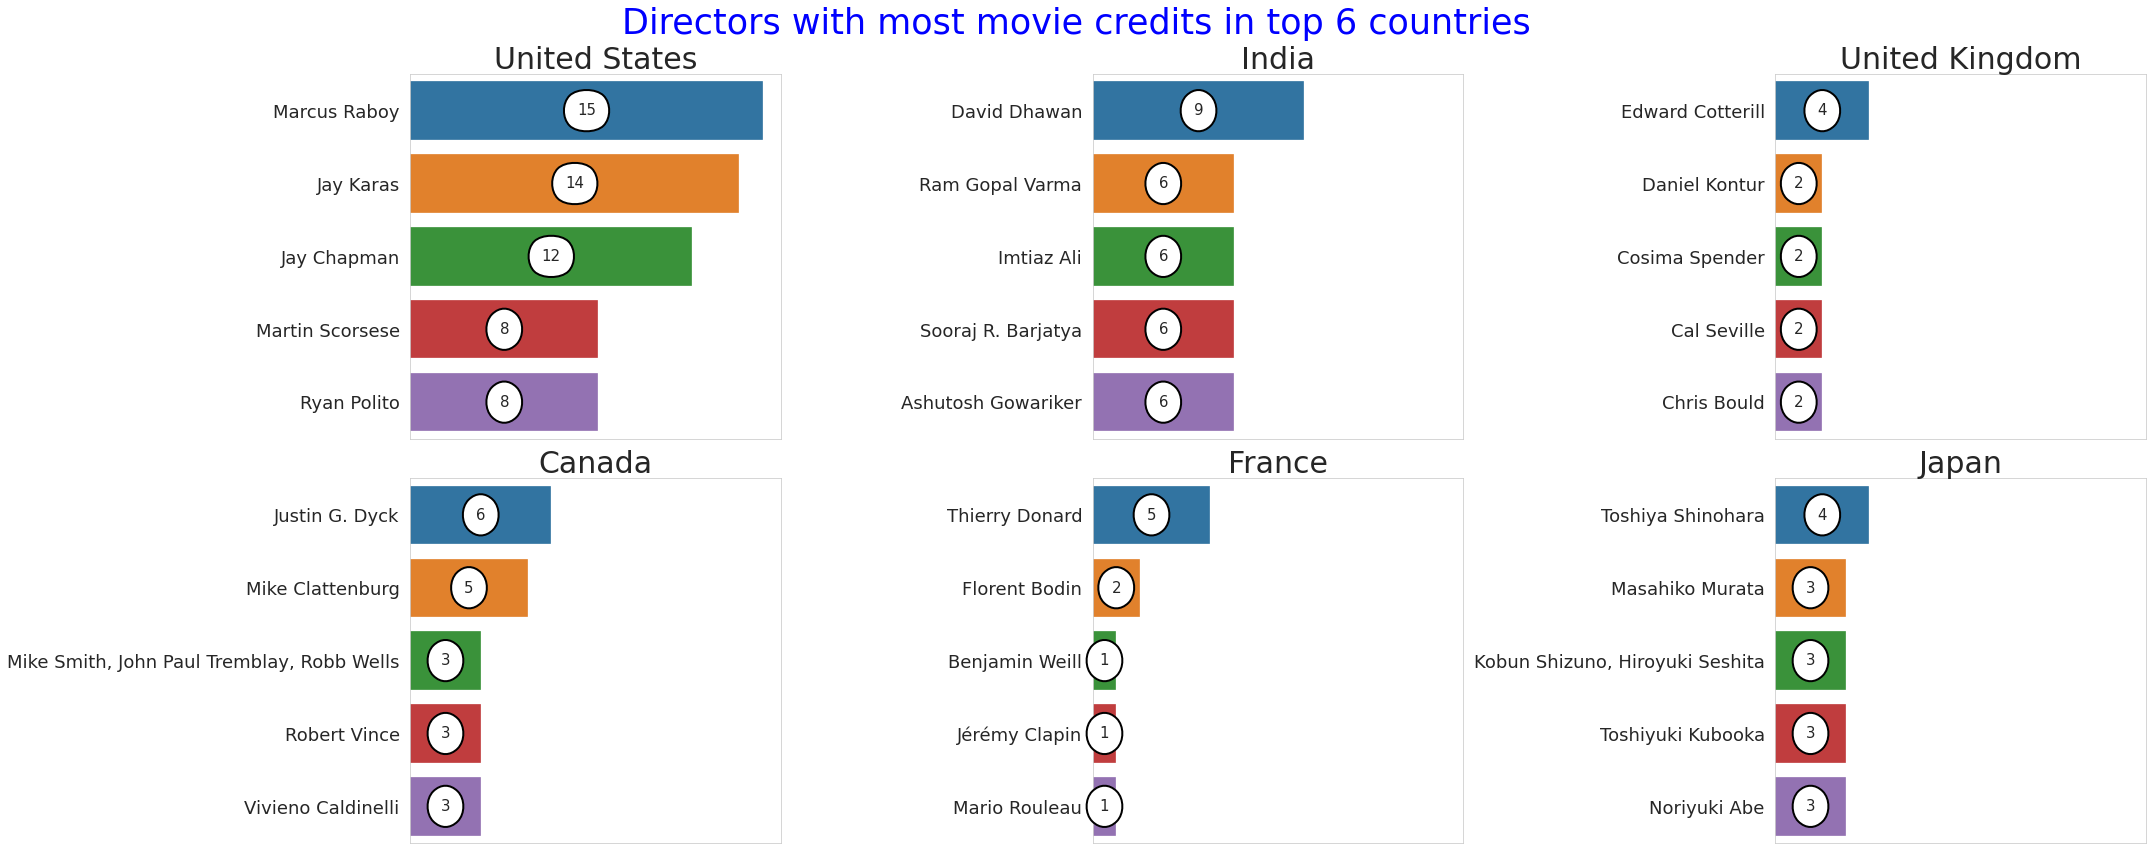

In [14]:
title = 'Directors with most movie credits in top 6 countries'
df_country = pd.DataFrame()
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (30,12), sharex = True)
_ = fig.suptitle(title, fontsize = 35, color = 'blue')
i,j = 0,0
n_countries = 6
n_directors = 5
for country in df_countries.tail(n_countries).country.values[::-1]:
    t_df = df[df.country == country].groupby(['director','country'], sort = False).count().sort_values('release_year')[-n_directors:][::-1].reset_index()
    plots = sns.barplot(data=t_df,y = 'director', x = 'release_year', ax =ax[i,j])
    for bar in plots.patches:
        _ = plots.annotate(format(bar.get_width(), '.0f'), 
               (bar.get_width()/2, 
                bar.get_y() + bar.get_height() / 2), ha='center', va='center',
               size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=1", fc="w", ec="black", lw=2),
               textcoords='offset points')
    _ = ax[i,j].set_xticks([])
    _ = ax[i,j].set_title(country,fontsize=30)
    _ = ax[i,j].set_xlabel('')
    _ = ax[i,j].set_ylabel('')
    df_country = df_country.append(t_df)
    j += 1
    if j> n_countries/2-1:
        j = 0
        i = 1
fig.tight_layout()
plt.savefig(title+'.'+img_fmt, format = img_fmt)

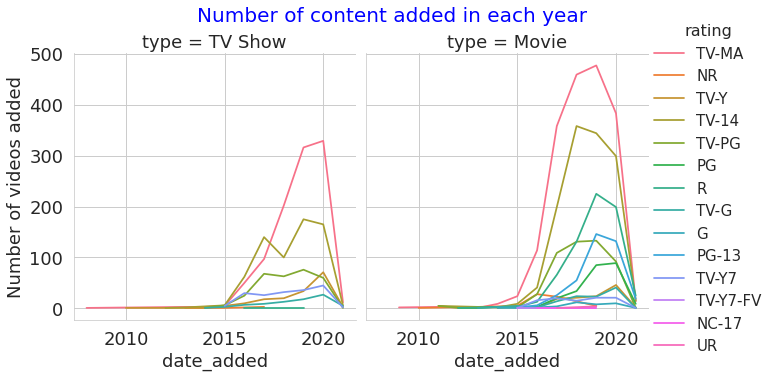

In [15]:
df_data_added = df[df.date_added >'2008-01-01'].groupby([df.date_added.dt.year,df.type,df.rating]).count().show_id.reset_index()
title = 'Number of content added in each year'
g = sns.relplot(data = df_data_added, x = 'date_added', y = 'show_id', col = 'type', hue ='rating',kind = 'line', markers = True,aspect = 0.9, height = 5)
_ = g.axes[0,0].set_ylabel('Number of videos added')
_ = g.fig.suptitle(title, color = 'blue',fontsize = 20)
_ = g.fig.subplots_adjust(top=0.85)
_ = plt.savefig(title+'.'+img_fmt,format = img_fmt)